In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, BatchNormalization
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
lag = 14 # 14(30min), 20(1hour), 32(2hour)

In [3]:
def Sigmoid(x):
    return (1.0 / (1.0 + np.exp(-x)))

In [17]:
# training dataset
df_train_2005 = pd.read_csv('2005.csv')
print(df_train_2005.shape)

df_train_2006 = pd.read_csv('2006.csv')
print(df_train_2006.shape)

train_data = np.concatenate((df_train_2005, df_train_2006), axis=0)
print(train_data.shape)
train_data

(104745, 3)
(105108, 3)
(209853, 3)


array([[3.70e+01, 1.04e-02, 6.70e+01],
       [4.90e+01, 1.25e-02, 6.50e+01],
       [3.60e+01, 9.40e-03, 6.50e+01],
       ...,
       [5.50e+01, 1.23e-02, 7.10e+01],
       [2.80e+01, 6.10e-03, 7.00e+01],
       [2.60e+01, 6.50e-03, 6.90e+01]])

In [13]:
arr = []
for i in range(9):
    arr.append(train_data[i:i-lag,:])

arr = np.array(arr, dtype=np.float32)
print(arr.shape)
arr

(9, 209839, 3)


array([[[3.70e+01, 1.04e-02, 6.70e+01],
        [4.90e+01, 1.25e-02, 6.50e+01],
        [3.60e+01, 9.40e-03, 6.50e+01],
        ...,
        [8.70e+01, 1.98e-02, 7.10e+01],
        [7.90e+01, 1.81e-02, 7.10e+01],
        [8.10e+01, 1.98e-02, 6.90e+01]],

       [[4.90e+01, 1.25e-02, 6.50e+01],
        [3.60e+01, 9.40e-03, 6.50e+01],
        [6.20e+01, 1.55e-02, 6.50e+01],
        ...,
        [7.90e+01, 1.81e-02, 7.10e+01],
        [8.10e+01, 1.98e-02, 6.90e+01],
        [9.10e+01, 2.05e-02, 6.90e+01]],

       [[3.60e+01, 9.40e-03, 6.50e+01],
        [6.20e+01, 1.55e-02, 6.50e+01],
        [1.04e+02, 2.40e-02, 6.50e+01],
        ...,
        [8.10e+01, 1.98e-02, 6.90e+01],
        [9.10e+01, 2.05e-02, 6.90e+01],
        [7.20e+01, 1.70e-02, 6.90e+01]],

       ...,

       [[7.70e+01, 1.93e-02, 6.40e+01],
        [9.70e+01, 2.48e-02, 6.30e+01],
        [9.70e+01, 2.46e-02, 6.20e+01],
        ...,
        [7.40e+01, 1.74e-02, 6.90e+01],
        [7.00e+01, 1.58e-02, 6.90e+01],
        [

In [18]:
x_train_val = np.concatenate((arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8]), axis=1).reshape(-1, 9, 3)
train_mean, train_std = np.mean(x_train_val, axis=0), np.std(x_train_val, axis=0)
train_mean, train_std = np.mean(train_mean, axis=0), np.mean(train_std, axis=0)

x_train_val = (x_train_val - train_mean) / (2 * train_std)
x_train_val = Sigmoid(x_train_val)

y_train_val = train_data[lag:, :].reshape(-1, 3)
y_train_val = (y_train_val - train_mean) / (2 * train_std)
y_train_val = Sigmoid(y_train_val)

print(x_train_val.shape, y_train_val.shape)
x_train_val

(209839, 9, 3) (209839, 3)


array([[[0.33920008, 0.38769013, 0.56655955],
        [0.349133  , 0.39223722, 0.53584135],
        [0.33837852, 0.3855317 , 0.53584135],
        ...,
        [0.3728136 , 0.407086  , 0.52036464],
        [0.39011773, 0.4192229 , 0.5048488 ],
        [0.39011773, 0.41877973, 0.4893235 ]],

       [[0.349133  , 0.39223722, 0.53584135],
        [0.33837852, 0.3855317 , 0.53584135],
        [0.36004335, 0.39876536, 0.53584135],
        ...,
        [0.39011773, 0.4192229 , 0.5048488 ],
        [0.39011773, 0.41877973, 0.4893235 ],
        [0.39011773, 0.41767243, 0.4893235 ]],

       [[0.33837852, 0.3855317 , 0.53584135],
        [0.36004335, 0.39876536, 0.53584135],
        [0.39624268, 0.41745108, 0.53584135],
        ...,
        [0.39011773, 0.41877973, 0.4893235 ],
        [0.39011773, 0.41767243, 0.4893235 ],
        [0.3857638 , 0.41435555, 0.5048488 ]],

       ...,

       [[0.38142803, 0.40818492, 0.62627274],
        [0.37453026, 0.40445238, 0.62627274],
        [0.37625006, 0

In [7]:
# test dataset
df_test_2007 = pd.read_csv('2007.csv')
test_data = df_test_2007.values

arr = []
for i in range(9):
    arr.append(test_data[i:i-lag,:])
    
arr = np.array(arr, dtype=np.float32)
print(arr.shape)

x_test = np.concatenate((arr[0], arr[1], arr[2], arr[3], arr[4], arr[5], arr[6], arr[7], arr[8]), axis=1).reshape(-1, 9, 3)
x_test = (x_test - train_mean) / (2 * train_std)
x_test = Sigmoid(x_test)

y_test = test_data[lag:, :].reshape(-1, 3)
y_test = (y_test - train_mean) / (2 * train_std)
y_test = Sigmoid(y_test)

print(x_test.shape, y_test.shape)

(9, 105082, 3)
(105082, 9, 3) (105082, 3)


In [8]:
# split into training and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(167871, 9, 3) (167871, 3) (41968, 9, 3) (41968, 3)


In [9]:
h_units = 32
activation_ = 'relu'

def rnn_model():
    model = Sequential()
    
    model.add(LSTM(units=h_units, return_sequences=False, input_shape=(9, 3)))        
    model.add(Dense(64))
    
    model.add(Dense(3))
    
    return model

In [10]:
# create a model 
model = rnn_model()
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 6,915
Trainable params: 6,915
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# training
tensorBoard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

hist = model.fit(x_train, y_train, epochs=100, batch_size=2048, verbose=True, validation_data=(x_val, y_val), shuffle=True, callbacks=[tensorBoard])
#hist = model.fit(x_train, y_train, epochs=100, batch_size=2048, verbose=True, validation_data=(x_val, y_val), shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 167871 samples, validate on 41968 samples


Epoch 1/100
167871/167871 [==============================] - 5s 32us/step - loss: 0.0398 - val_loss: 0.0042
Epoch 2/100
167871/167871 [==============================] - 5s 28us/step - loss: 0.0033 - val_loss: 0.0029
Epoch 3/100
167871/167871 [==============================] - 4s 25us/step - loss: 0.0028 - val_loss: 0.0027
Epoch 4/100
167871/167871 [==============================] - 4s 24us/step - loss: 0.0027 - val_loss: 0.0026
Epoch 5/100
167871/167871 [==============================] - 4s 26us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 6/100
167871/167871 [==============================] - 5s 28us/step - loss: 0.0025 - val_loss: 0.0025
Epoch 7/100
167871/167871 [==============================] - 4s 27us/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/100
167871/167871 [==============================] - 5s 28us/step - loss: 0.0024 - val_

KeyboardInterrupt: 

In [19]:
y_pred = model.predict(x_test, batch_size=1024, verbose=True) 
print(y_pred.shape)
print(model.evaluate(x_test, y_test,batch_size=1024))

105082/105082 [==============================] - 1s 7us/step
(105082, 3)
105082/105082 [==============================] - 1s 7us/step
0.0015936703889924352


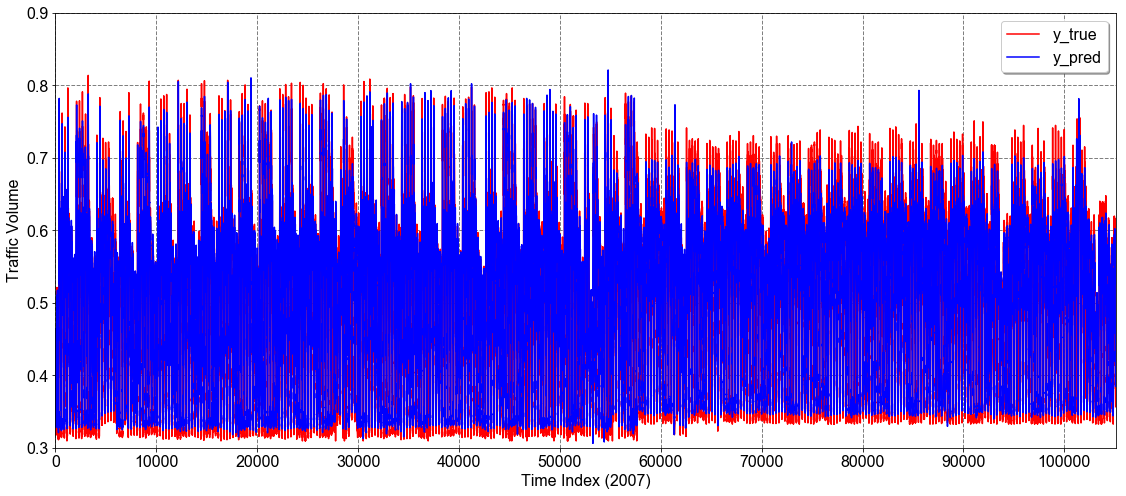

In [24]:
# visualization for prediction result
# set figure size
plt.figure(figsize=(19,8))

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# plot data 
plt.plot(y_test[:,0], 'r', label='y_true')
plt.plot(y_pred[:,0], 'b', label='y_pred')

# set legend position
plt.legend(shadow=True, loc='upper right')

# set x-axis & y-axis titles
#plt.title('prediction result')
plt.xlabel('Time Index (2007)')
plt.ylabel('Traffic Volume')

# set axis-limits
plt.xlim(left = 0, right = len(y_test)) 
plt.ylim(bottom = 0.3) 

# set grid
plt.grid(color='gray', linestyle='--', linewidth=1)

plt.xticks(np.arange(0,105082,10000))
plt.yticks(np.arange(0.3,1.0,0.1))

# save & display figure
plt.show()

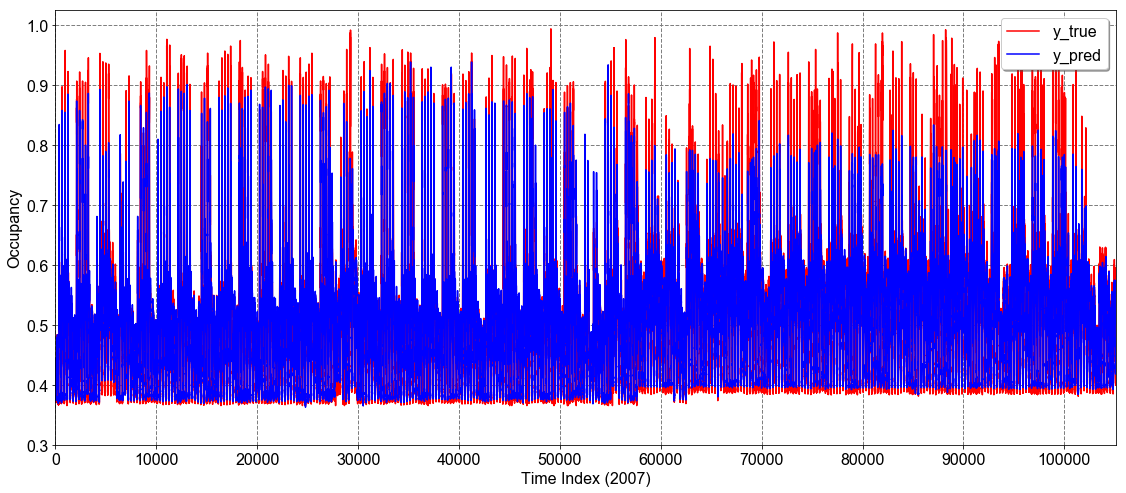

In [26]:
# visualization for prediction result
# set figure size
plt.figure(figsize=(19,8))

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# plot data 
plt.plot(y_test[:,1], 'r', label='y_true')
plt.plot(y_pred[:,1], 'b', label='y_pred')

# set legend position
plt.legend(shadow=True, loc='upper right')

# set x-axis & y-axis titles
#plt.title('prediction result')
plt.xlabel('Time Index (2007)')
plt.ylabel('Occupancy')

# set axis-limits
plt.xlim(left = 0, right = len(y_test)) 
plt.ylim(bottom = 0.3) 

# set grid
plt.grid(color='gray', linestyle='--', linewidth=1)

plt.xticks(np.arange(0,105082,10000))
plt.yticks(np.arange(0.3,1.1,0.1))

# save & display figure
plt.show()

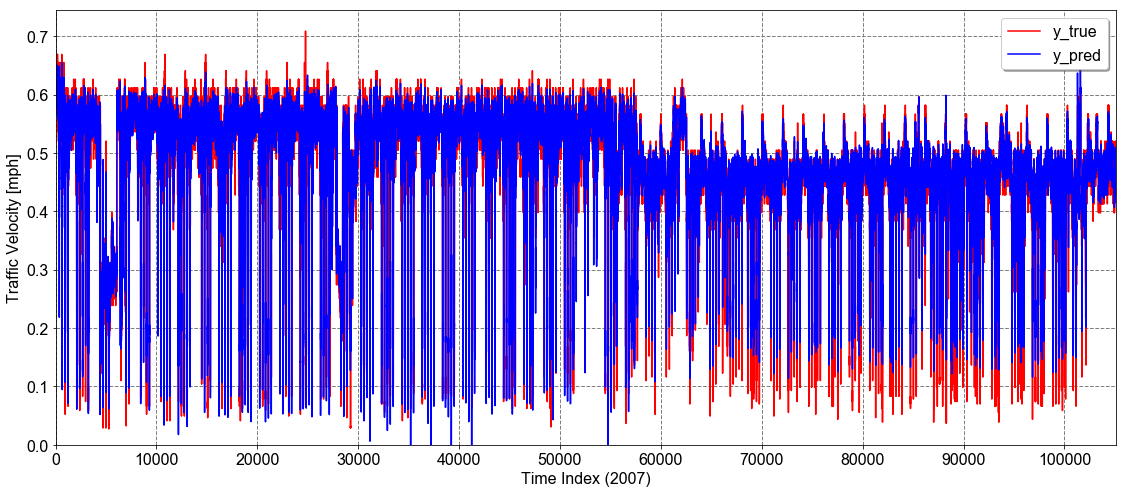

In [27]:
# visualization for prediction result
# set figure size
plt.figure(figsize=(19,8))

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# plot data 
plt.plot(y_test[:,2], 'r', label='y_true')
plt.plot(y_pred[:,2], 'b', label='y_pred')

# set legend position
plt.legend(shadow=True, loc='upper right')

# set x-axis & y-axis titles
#plt.title('prediction result')
plt.xlabel('Time Index (2007)')
plt.ylabel('Traffic Velocity [mph]')

# set axis-limits
plt.xlim(left = 0, right = len(y_test)) 
plt.ylim(bottom = 0) 

# set grid
plt.grid(color='gray', linestyle='--', linewidth=1)

plt.xticks(np.arange(0,105082,10000))
plt.yticks(np.arange(0,0.8,0.1))

# save & display figure
plt.show()